In [1]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
# date_range生成一个时间范围
# start, end是开始和结束事件
# periods是生成的时间个数, freq是生成的频率
print(pd.date_range(start="20171230", end="20180131", freq="D"))
print(pd.date_range(start="20171230", end="20180131", freq="10D"))
print(pd.date_range(start="20171230", periods=10, freq="D"))
print(pd.date_range(start="20171230", periods=10, freq="M"))

DatetimeIndex(['2017-12-30', '2017-12-31', '2018-01-01', '2018-01-02',
               '2018-01-03', '2018-01-04', '2018-01-05', '2018-01-06',
               '2018-01-07', '2018-01-08', '2018-01-09', '2018-01-10',
               '2018-01-11', '2018-01-12', '2018-01-13', '2018-01-14',
               '2018-01-15', '2018-01-16', '2018-01-17', '2018-01-18',
               '2018-01-19', '2018-01-20', '2018-01-21', '2018-01-22',
               '2018-01-23', '2018-01-24', '2018-01-25', '2018-01-26',
               '2018-01-27', '2018-01-28', '2018-01-29', '2018-01-30',
               '2018-01-31'],
              dtype='datetime64[ns]', freq='D')
DatetimeIndex(['2017-12-30', '2018-01-09', '2018-01-19', '2018-01-29'], dtype='datetime64[ns]', freq='10D')
DatetimeIndex(['2017-12-30', '2017-12-31', '2018-01-01', '2018-01-02',
               '2018-01-03', '2018-01-04', '2018-01-05', '2018-01-06',
               '2018-01-07', '2018-01-08'],
              dtype='datetime64[ns]', freq='D')
DatetimeInde

In [8]:
index=pd.date_range("20170101",periods=10)
df = pd.DataFrame(np.random.rand(10),index=index)
print(df)
print("="*30)

file_path = "./911.csv"
df = pd.read_csv(file_path)
print(df.head(1))
print("#"*30)
# to_datetime方法可以把时间字符串转为时间序列
# 这里将原来的索引转为时间序列
df["timeStamp"] = pd.to_datetime(df["timeStamp"])
df.set_index("timeStamp", inplace=True)
print(df.head())

                   0
2017-01-01  0.651523
2017-01-02  0.925379
2017-01-03  0.294436
2017-01-04  0.232986
2017-01-05  0.017557
2017-01-06  0.402957
2017-01-07  0.704423
2017-01-08  0.174751
2017-01-09  0.812198
2017-01-10  0.260686
         lat        lng                                               desc  \
0  40.297876 -75.581294  REINDEER CT & DEAD END;  NEW HANOVER; Station ...   

       zip                   title            timeStamp          twp  \
0  19525.0  EMS: BACK PAINS/INJURY  2015-12-10 17:10:52  NEW HANOVER   

                     addr  e  
0  REINDEER CT & DEAD END  1  
##############################
                           lat        lng  \
timeStamp                                   
2015-12-10 17:10:52  40.297876 -75.581294   
2015-12-10 17:29:21  40.258061 -75.264680   
2015-12-10 14:39:21  40.121182 -75.351975   
2015-12-10 16:47:36  40.116153 -75.343513   
2015-12-10 16:56:52  40.251492 -75.603350   

                                                          

要统计每个月或者每个季度的次数怎么办呢

重采样：指的是将时间序列从一个频率转化为另一个频率进行处理的过程，将高频率数据转化为低频率数据为降采样，低频率转化为高频率为升采样。pandas提供了一个resample的方法来帮助我们实现频率转化。

1. 统计出911数据中不同月份电话次数的变化情况
2. 统计出911数据中不同月份不同类型的电话的次数的变化情况



In [3]:
# 通过重采样将时间戳转换到月份的范围
data1 = df.resample("M").count()["title"]
print(data1)

timeStamp
2015-12-31     7916
2016-01-31    13096
2016-02-29    11396
2016-03-31    11059
2016-04-30    11287
2016-05-31    11374
2016-06-30    11732
2016-07-31    12088
2016-08-31    11904
2016-09-30    11669
2016-10-31    12502
2016-11-30    12091
2016-12-31    12162
2017-01-31    11605
2017-02-28    10267
2017-03-31    11684
2017-04-30    11056
2017-05-31    11719
2017-06-30    12333
2017-07-31    11768
2017-08-31    11753
2017-09-30    11332
2017-10-31    12337
2017-11-30    11548
2017-12-31    12941
2018-01-31    13123
2018-02-28    11165
2018-03-31    14923
2018-04-30    11240
2018-05-31    12551
2018-06-30    12106
2018-07-31    12549
2018-08-31    12315
2018-09-30    12338
2018-10-31    12976
2018-11-30    14097
2018-12-31    12144
2019-01-31    12304
2019-02-28    11556
2019-03-31    12441
2019-04-30    11845
2019-05-31    12823
2019-06-30    12322
2019-07-31    13166
2019-08-31    12387
2019-09-30    11874
2019-10-31    13425
2019-11-30    12446
2019-12-31    12529
2020-01-31

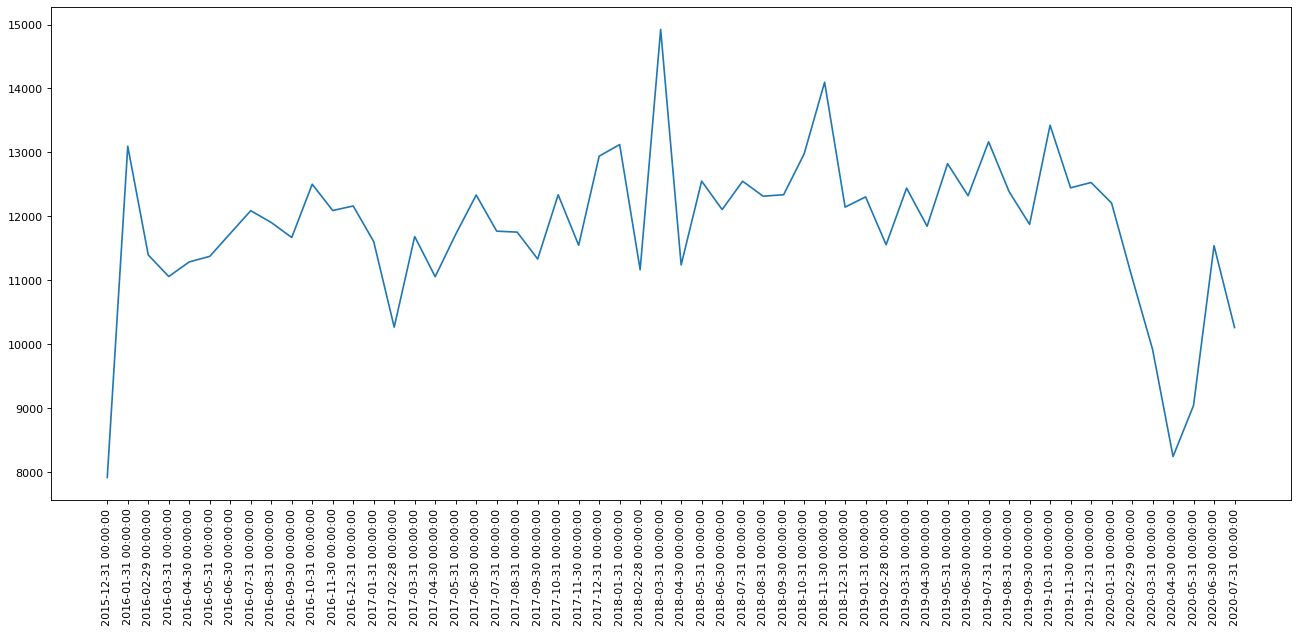

In [4]:
_x = data1.index
_y = data1.values
plt.figure(figsize=(20, 8), dpi=80)
plt.plot(range(len(_x)), _y)
plt.xticks(range(len(_x)), _x, rotation=90)
plt.show()

In [5]:
# 统计不同月份不同类型的案件情况
# 添加列表示分类
data1 = df["title"].str.split(':').tolist()
data1 = [i[0] for i in data1]
df["cate"] = pd.DataFrame(np.array(data1).reshape((df.shape[0], 1)))
print(df)

                           lat        lng  \
timeStamp                                   
2015-12-10 17:10:52  40.297876 -75.581294   
2015-12-10 17:29:21  40.258061 -75.264680   
2015-12-10 14:39:21  40.121182 -75.351975   
2015-12-10 16:47:36  40.116153 -75.343513   
2015-12-10 16:56:52  40.251492 -75.603350   
...                        ...        ...   
2020-07-29 15:46:51  40.157956 -75.348060   
2020-07-29 15:52:19  40.136306 -75.428697   
2020-07-29 15:52:52  40.013779 -75.300835   
2020-07-29 15:54:08  40.121603 -75.351437   
2020-07-29 15:52:46  40.015046 -75.299674   

                                                                  desc  \
timeStamp                                                                
2015-12-10 17:10:52  REINDEER CT & DEAD END;  NEW HANOVER; Station ...   
2015-12-10 17:29:21  BRIAR PATH & WHITEMARSH LN;  HATFIELD TOWNSHIP...   
2015-12-10 14:39:21  HAWS AVE; NORRISTOWN; 2015-12-10 @ 14:39:21-St...   
2015-12-10 16:47:36  AIRY ST & SWEDE ST;  NO